# 202020940 신중훈 인공지능 기초 midterm 

# **라이브러리 가져오기**

In [1]:
#라이브러리 설치
%pip install torchvision
%pip install torchinfo
%pip install pytorchcv

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#라이브러리 불러오기(1)
import torch
import torch.nn as nn
from torch.autograd import Variable

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchinfo import summary

from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix



In [3]:
#영어 폰트 변경및 폰트깨짐 해결
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]
from matplotlib import font_manager, rc
font_path = '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
#라이브러리 불러오기(2)
import pytorchcv

from pytorchcv import load_mnist, train, plot_results, plot_convolution, display_dataset, output_label
load_mnist(batch_size=100) 

100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [5]:
# 데이터로더에서 다음 배치를 가져와서 배치의 크기를 반환합니다.
a = next(iter(train_loader))
a[0].size()

torch.Size([100, 1, 28, 28])

In [6]:
#데이터 개수
print(len(data_train))
print(len(data_valid))
print(len(data_test))


60000
7000
3000


100


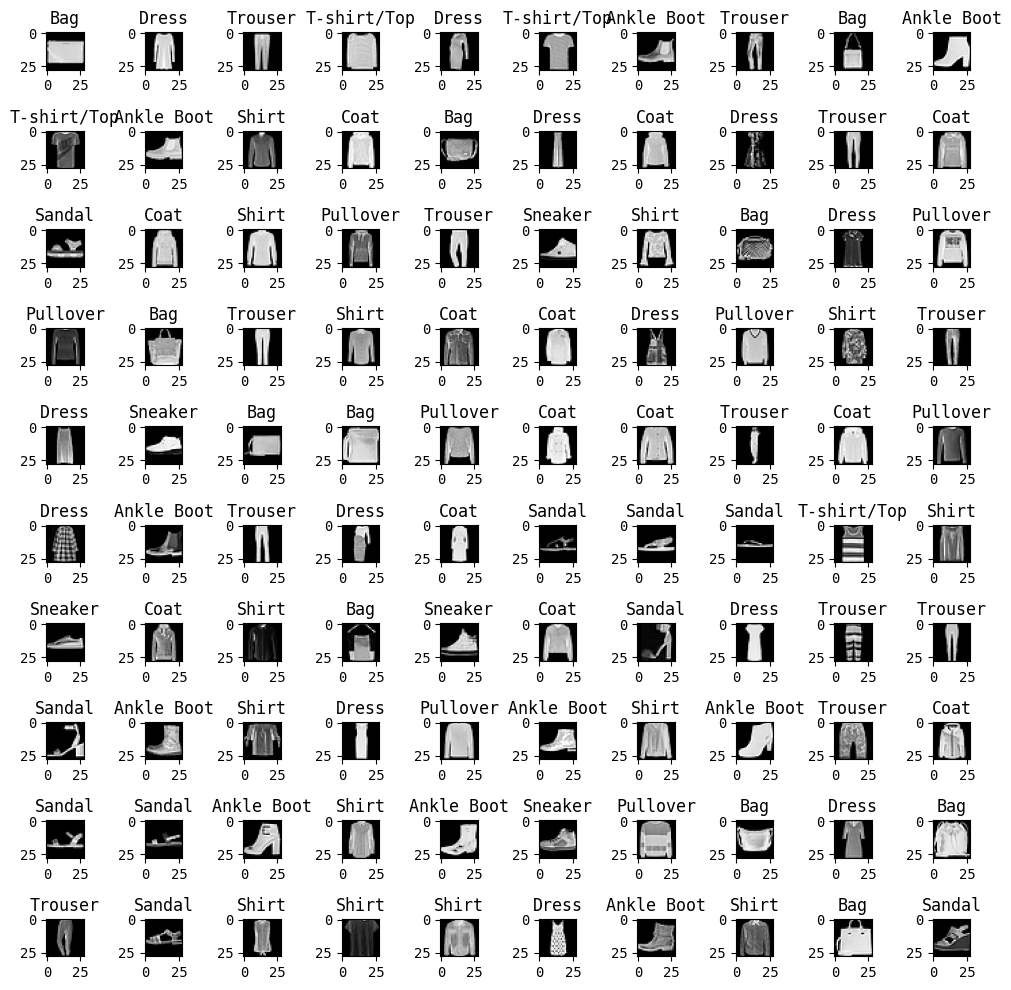

In [7]:
# 조건 1-II. 이미지 데이터의 형태와 클래스 레이블을 시각적으로 탐색하고 분석합니다.

# 다음 배치에서 이미지와 레이블을 가져옵니다.
images, labels = next(iter(train_loader))

# 배치에 포함된 이미지의 개수를 출력합니다.
print(len(images))

# 이미지를 시각화하기 위한 플롯을 생성합니다. (10x10 격자 형태)
plt.figure(figsize=(10, 10))

# 배치에 포함된 각 이미지에 대해 반복합니다.
for i in range(len(images)):
    # 10x10 격자에서 현재 이미지의 위치를 계산합니다.
    plt.subplot(10, 10, i+1)
    # 현재 이미지를 회색조로 플로팅합니다.
    plt.imshow(images[i].squeeze(), cmap="gray")
    # 이미지의 제목으로 해당하는 레이블을 출력합니다.
    plt.title(output_label(labels[i]))

# 플롯들이 겹치지 않도록 레이아웃을 조정합니다.
plt.tight_layout()
# 플롯을 표시합니다.
plt.show()

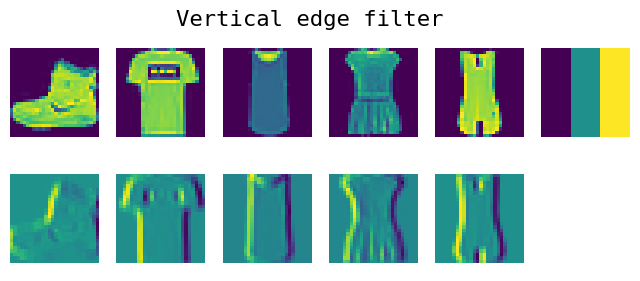

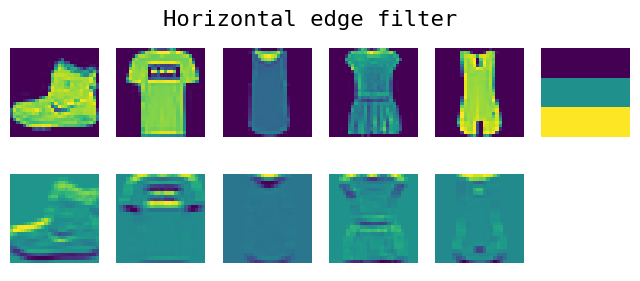

In [8]:
plot_convolution(torch.tensor([[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]]),'Vertical edge filter')
plot_convolution(torch.tensor([[-1.,-1.,-1.],[0.,0.,0.],[1.,1.,1.]]),'Horizontal edge filter')

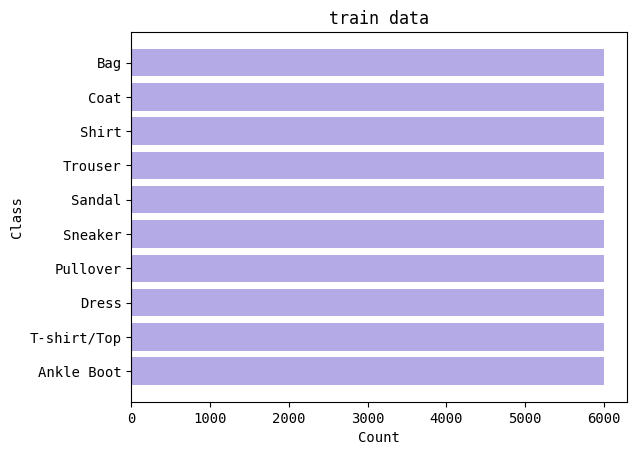

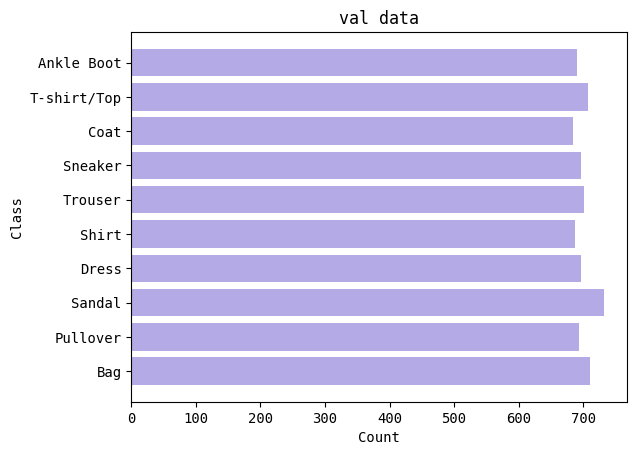

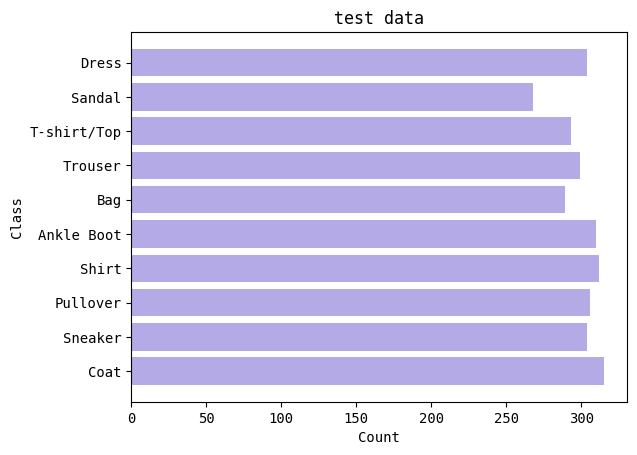

In [9]:
def plot_class_distribution(title, dataset, class_names):
    # 각 클래스의 데이터 개수를 저장할 딕셔너리를 초기화합니다.
    class_counts = {}
    
    # 데이터셋에서 각 이미지의 레이블을 확인하고 클래스별 개수를 계산합니다.
    for _, label in dataset:
        class_counts[label] = class_counts.get(label, 0) + 1
    
    # 클래스 이름을 사용하여 레이블을 변환합니다.
    labels = [class_names[label] for label in class_counts.keys()] 
    # 각 클래스의 데이터 개수를 리스트로 가져옵니다.
    counts = list(class_counts.values())
    
    # 그래프 제목 설정
    plt.title(title)
    # 가로 막대 그래프를 그립니다. (클래스 이름을 y축으로, 클래스별 데이터 개수를 x축으로)
    plt.barh(labels, counts, color='#B3AAE6')  
    # x축 레이블 설정
    plt.xlabel('Count')
    # y축 레이블 설정
    plt.ylabel('Class')  
    # 그래프를 표시합니다.
    plt.show()

# 클래스 정보를 직접 제공
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# Test 데이터셋의 클래스 분포를 시각화합니다.
plot_class_distribution("train data", data_train, class_names)
# Valid 데이터셋의 클래스 분포를 시각화합니다.
plot_class_distribution("val data", data_valid, class_names)
# Test 데이터셋의 클래스 분포를 시각화합니다.
plot_class_distribution("test data", data_test, class_names)  

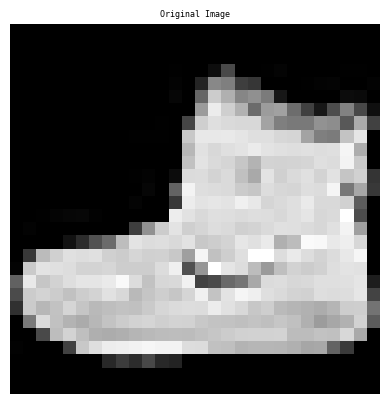

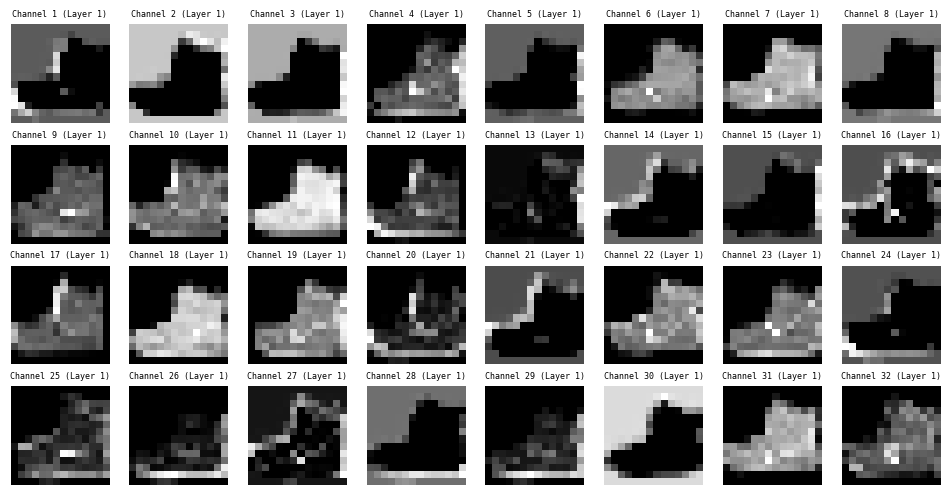

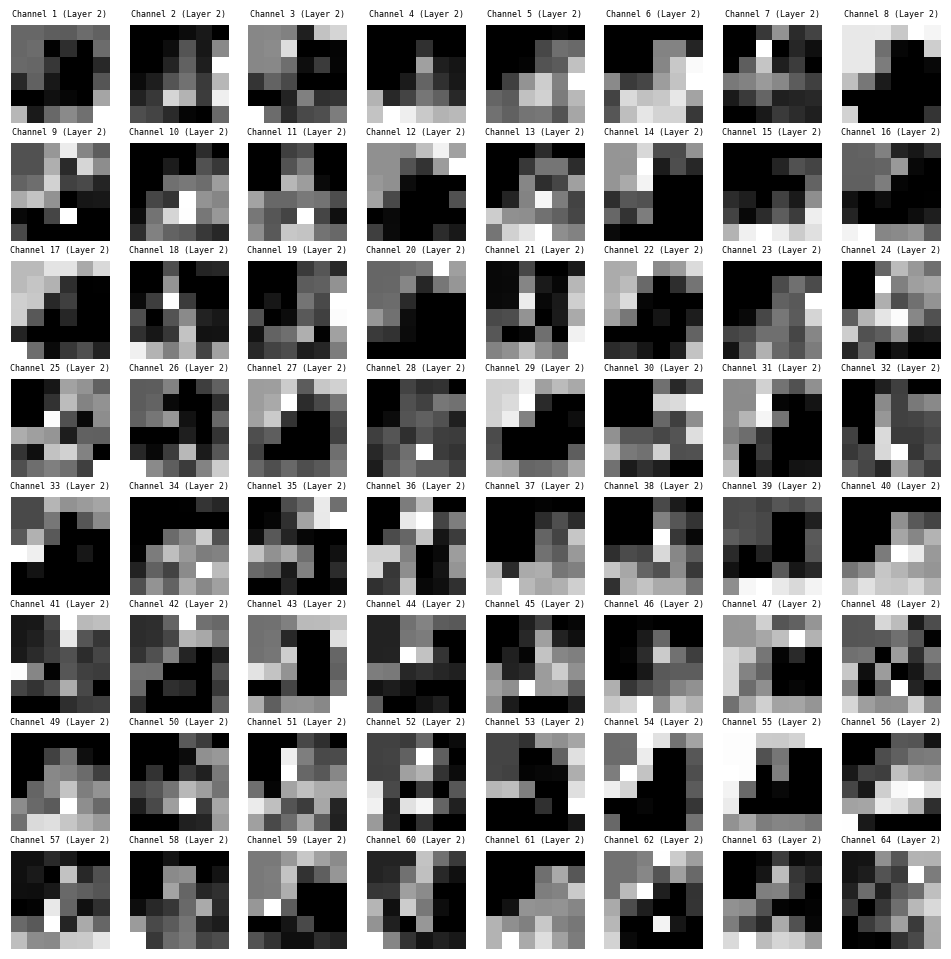

FC3 output: tensor([[ 0.0423,  0.1180, -0.3448, -0.3230, -0.0891,  0.0399, -0.1636, -0.0705,
          0.1658, -0.1665]], grad_fn=<AddmmBackward0>)


In [10]:
import matplotlib.pyplot as plt

# 플롯의 기본 폰트 크기 설정
plt.rcParams['font.size'] = 5

# 각 레이어 정의
layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1), 
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )  
layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
fc1 = nn.Linear(in_features=64*6*6, out_features=600)
fc2 = nn.Linear(in_features=600, out_features=120)
fc3 = nn.Linear(in_features=120, out_features=10)

# 첫 번째 훈련 이미지 가져오기
image, _ = data_train[0]

# 레이어 적용
layer1_image = layer1(image.unsqueeze(0))
layer2_image = layer2(layer1_image)
fc1_result = fc1(layer2_image.view(-1, 64*6*6))
fc2_result = fc2(fc1_result)
fc3_result = fc3(fc2_result)

# 원본 이미지 플롯
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Layer 1의 각 채널 플롯
num_channels, height, width = layer1_image.squeeze().size()
fig, axs = plt.subplots(4, 8, figsize=(12, 6))
for i in range(num_channels):
    row = i // 8
    col = i % 8
    axs[row, col].imshow(layer1_image.squeeze()[i].detach().numpy(), cmap='gray')
    axs[row, col].set_title(f'Channel {i+1} (Layer 1)')
    axs[row, col].axis('off')
plt.show()

# Layer 2의 각 채널 플롯
num_channels, height, width = layer2_image.squeeze().size()
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(num_channels):
    row = i // 8
    col = i % 8
    axs[row, col].imshow(layer2_image.squeeze()[i].detach().numpy(), cmap='gray')
    axs[row, col].set_title(f'Channel {i+1} (Layer 2)')
    axs[row, col].axis('off')
plt.show()

#print("FC1 output:", fc1_result)
#print("FC2 output:", fc2_result)
# FC3 출력 표시
print("FC3 output:", fc3_result)

## CNN 구축

* 조건 2-II 간단한 CNN 모델을 구축합니다. 모델은 적어도 한 개의 컨볼루션 레이어와 풀링 레이어를 포함해야 합니다.

* 모델 클래스 만들기

* 신경망에는 다음과 같은 레이어가 있습니다:
    * 두 개의 순차 레이어는 각각 다음 레이어로 구성됩니다.
        * 커널 크기가 3 * 3이고 첫 번째 레이어에서 패딩 = 1(zero_padding)이고 두 번째 레이어에서 패딩 = 0인 컨볼루션 레이어입니다. 두 레이어 모두 스트라이드는 1입니다.
        * 일괄 정규화 계층.
        * 활성화 기능: ReLU.
        * 커널 크기가 2 * 2이고 스트라이드가 2인 최대 풀링 레이어.
     * Dense 레이어(일명 완전 연결 레이어)의 출력을 평탄화합니다.
     * 3 다양한 입/출력 기능을 갖춘 완전히 연결된 레이어입니다.
     * 클래스 확률 p = 0.25인 드롭아웃 레이어 1개.
  
     * 모든 기능은 CNN의 순방향 통과를 정의하는 순방향 방법으로 제공됩니다.
     * 입력 이미지가 다음과 같이 변경됩니다.
        * 첫 번째 Convulation 레이어 : 입력: 28 \* 28 \* 3, 출력: 28 \* 28 \* 32
        * 첫 번째 Max Pooling 레이어 : 입력: 28 \* 28 \* 32, 출력: 14 \* 14 \* 32
        * 두 번째 Conv 레이어: 입력: 14 \* 14 \* 32, 출력: 12 \* 12 \* 64
        * 두 번째 최대 풀링 계층: 12 \* 12 \* 64, 출력: 6 \* 6 \* 64
    * 최종 완전 연결 레이어에는 10가지 유형의 옷에 대한 10가지 출력 특성이 있습니다.





In [11]:
#조건 2-I 간단한 CNN 모델을 구축합니다. 모델은 적어도 한 개의 컨볼루션 레이어와 풀링 레이어를 포함해야 합니다.
import torch.nn as nn  # 파이토치의 신경망 모듈(nn)을 임포트
# %pip install torchsummary  # 신경망 모델의 요약 정보를 제공하는 torchsummary 라이브러리를 설치
from torchsummary import summary  # 설치된 torchsummary에서 summary 함수를 임포트
import matplotlib.pyplot as plt  # 그래프 그리기를 위한 라이브러리 설치

class CNN(nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        
        # 첫 번째 컨볼루션 레이어와 풀링 레이어를 정의
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # 두 번째 컨볼루션 레이어와 풀링 레이어를 정의
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # 완전 연결된 레이어들을 정의
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout(0.25)  # 드롭아웃 레이어를 정의 [regularization technique] 수업시간에 말씀해주신 overfitting을 줄이기위한 방법중 한가지.
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        if x.dim() == 5 and x.size(2) == 1:  # 입력 x의 차원이 예상치 못한 추가 차원을 포함하는 경우, 해당 차원을 제거
            x = x.squeeze(2)
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out
    
# CNN 클래스의 인스턴스 생성
net = CNN()

# 모델 요약 정보 출력
summary(net, input_size=(1, 1, 28, 28))  # input_size는 모델이 기대하는 입력 데이터의 크기를 (채널 수, 높이, 너비) 형식으로 지정합니다.

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
       BatchNorm2d-2           [-1, 32, 28, 28]              64
              ReLU-3           [-1, 32, 28, 28]               0
         MaxPool2d-4           [-1, 32, 14, 14]               0
            Conv2d-5           [-1, 64, 12, 12]          18,496
       BatchNorm2d-6           [-1, 64, 12, 12]             128
              ReLU-7           [-1, 64, 12, 12]               0
         MaxPool2d-8             [-1, 64, 6, 6]               0
            Linear-9                  [-1, 600]       1,383,000
          Dropout-10                  [-1, 600]               0
           Linear-11                  [-1, 120]          72,120
           Linear-12                   [-1, 10]           1,210
Total params: 1,475,338
Trainable params: 1,475,338
Non-trainable params: 0
---------------------------

In [12]:
# 조건 2-III 훈련 데이터를 사용하여 모델을 훈련시키고, 훈련 과정에서의 손실과 정확도를 모니터링합니다.

import torch  # PyTorch에서 모델을 구성하고 최적화하는 데 필요한 함수와 클래스를 제공합니다
from torch import optim
import torch.nn.functional as F

def train(model, train_loader, test_loader, epochs=5):  # 모델, 학습 데이터 로더, 테스트 데이터 로더, 그리고 에폭 수를 매개변수로 받는 학습 함수입니다.
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # 사용 가능한 경우 CUDA를 사용하고, 그렇지 않으면 CPU를 사용하도록 설정합니다.
    model.to(device)  # 모델을 해당 장치로 이동합니다.
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 최적화 도구를 사용하여 모델의 매개변수를 최적화하며, 학습률은 0.001로 설정합니다.
    criterion = torch.nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 크로스 엔트로피 손실 함수를 사용합니다.

    history = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': []}  # 학습 및 테스트 과정에서의 손실과 정확도를 기록하기 위한 딕셔너리입니다.

    try:
        for epoch in range(epochs):  # 지정된 에폭 수만큼 반복하며 모델의 학습 및 평가를 수행합니다.
            model.train()  # 학습 모드로 설정합니다.
            train_loss, train_correct, train_total = 0, 0, 0
            for data, target in train_loader:  # 각 배치 데이터에 대해 학습을 수행합니다.
                data, target = data.to(device), target.to(device)  # 데이터와 타겟을 해당 장치로 이동합니다.
                optimizer.zero_grad()  # 그래디언트를 초기화합니다.
                output = model(data)  # 모델을 통해 예측을 수행합니다.

                loss = criterion(output, target)  # 손실을 계산합니다.
                loss.backward()  # 역전파를 수행합니다.
                optimizer.step()  # 최적화를 수행합니다.

                train_loss += loss.item()  # 손실을 누적합니다.
                _, predicted = torch.max(output.data, 1)  # 예측값을 계산합니다.
                train_total += target.size(0)
                train_correct += (predicted == target).sum().item()

            train_loss /= len(train_loader.dataset)  # 평균 손실을 계산합니다.
            train_acc = 100. * train_correct / train_total  # 정확도를 계산합니다.
            history['train_loss'].append(train_loss)  # 학습 손실을 기록합니다.
            history['train_acc'].append(train_acc)  # 학습 정확도를 기록합니다.

            model.eval()  # 평가 모드로 설정합니다.
            test_loss, test_correct, test_total = 0, 0, 0
            with torch.no_grad():
                for data, target in test_loader:  # 테스트 데이터에 대해 평가를 수행합니다.
                    data, target = data.to(device), target.to(device)
                    output = model(data)

                    test_loss += criterion(output, target).item()  # 평가 손실을 누적합니다.
                    _, predicted = torch.max(output.data, 1)
                    test_total += target.size(0)
                    test_correct += (predicted == target).sum().item()

            test_loss /= len(test_loader.dataset)  # 평균 평가 손실을 계산합니다.
            test_acc = 100. * test_correct / test_total  # 평가 정확도를 계산합니다.
            history['test_loss'].append(test_loss)  # 평가 손실을 기록합니다.
            history['test_acc'].append(test_acc)  # 평가 정확도를 기록합니다.

            print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')

    except Exception as e:  # 에러가 발생할 경우 처리합니다.
        print(f"An error occurred: {e}")
        return None

    return history  # 학습과 테스트 과정에서의 손실과 정확도를 기록한 history 딕셔너리를 반환합니다.

In [13]:
import random
def test(model, test_loader): 
    # 학습된 모델과 테스트 데이터 로더를 입력으로 받아서 평가 과정을 수행하는 함수를 정의합니다.
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
    # CUDA가 사용 가능한 경우 CUDA를 사용하고, 그렇지 않으면 CPU를 사용합니다.
    model.to(device) 
    # 모델을 해당 장치로 이동합니다.
    criterion = torch.nn.CrossEntropyLoss() 
    # 다중 클래스 분류에 사용할 크로스 엔트로피 손실 함수를 정의합니다.
    
    history = {'test_loss': [], 'test_acc': []}
    # 테스트 손실과 정확도를 기록할 딕셔너리를 초기화합니다.

    try:
        model.eval() 
        # 모델을 평가 모드로 설정합니다.

        test_loss, test_correct, test_total = 0, 0, 0 
        # 손실, 정확한 예측 수, 총 데이터 수를 초기화합니다.


        with torch.no_grad():
            # 그래디언트 추적을 비활성화하여 평가하는 동안에는 그래디언트를 계산하지 않습니다.
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data) 

                if output is None:
                    print("Warning: Model output is None.")
                    continue
                
                loss = criterion(output, target) 
                
                if loss is None:
                    print("Warning: Loss computation returned None.")
                    continue
                
                test_loss += loss.item() 
                _, predicted = torch.max(output, 1) 
                test_total += target.size(0) 
                test_correct += (predicted == target).sum().item() 

        test_acc = 100. * test_correct / test_total
        test_loss /= len(test_loader.dataset)
        print(f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')


    except Exception as e: 
        # 에러가 발생할 경우 처리합니다. 에러가 발생하면 해당 에러 메시지를 출력하고 None을 반환합니다.
        print(f"An error occurred: {e}")
        return None
    
    return history 
    # 테스트 과정에서 손실과 정확도를 기록한 history 딕셔너리를 반환합니다.


In [14]:
# 조건 3-I 테스트 데이터셋을 사용하여 모델을 평가하고, 최종 정확도를 보고합니다.

def class_accuracy(model, test_loader):
    # 모델과 테스트 데이터 로더를 입력으로 받아서 클래스별 정확도를 계산하는 함수를 정의합니다.
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # CUDA가 사용 가능한 경우 CUDA를 사용하고, 그렇지 않으면 CPU를 사용합니다.
    model.to(device)
    # 모델을 해당 장치로 이동합니다.
    model.eval()
    # 모델을 평가 모드로 설정합니다.

    class_correct = [0. for _ in range(10)]  # 각 클래스별 올바르게 예측된 수를 기록할 리스트를 초기화합니다.
    total_correct = [0. for _ in range(10)]  # 각 클래스별 총 데이터 수를 기록할 리스트를 초기화합니다.
    
    with torch.no_grad():
        # 그래디언트 추적을 비활성화하여 평가하는 동안에는 그래디언트를 계산하지 않습니다.
        for data, labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
        
            predicted = torch.max(outputs, 1)[1]  # 각 데이터에서 가장 확률이 높은 클래스를 예측합니다.
            c = (predicted == labels).squeeze()  # 예측과 실제 레이블이 일치하는지 여부를 확인합니다.
            for i in range(len(c)):
                label = labels[i]
                class_correct[label] += c[i].item()  # 클래스별로 올바르게 예측된 수를 업데이트합니다.
                total_correct[label] += 1  # 클래스별로 총 데이터 수를 업데이트합니다.
            
    min_accuracy = 100.0  # 가장 낮은 정확도를 초기화합니다.
    min_class = -1  # 가장 낮은 정확도를 가진 클래스를 초기화합니다.

    for i in range(10):
        accuracy = (class_correct[i] * 100 / total_correct[i])  # 각 클래스별 정확도를 계산합니다.
        print("{}의 정확도: {:.2f}%".format(output_label(i), accuracy))  # 각 클래스의 정확도를 출력합니다.
        if accuracy < min_accuracy:
            min_accuracy = accuracy  # 현재까지의 최소 정확도를 업데이트합니다.
            min_class = i  # 현재까지의 최소 정확도를 가진 클래스를 업데이트합니다.
            
    print("{}의 정확도가 가장 낮습니다: {:.2f}%".format(output_label(min_class), min_accuracy))  # 가장 낮은 정확도를 가진 클래스를 출력합니다.



Epoch 1/10: Train Loss: 0.0044, Train Acc: 84.40%, Test Loss: 0.0034, Test Acc: 88.23%
Epoch 2/10: Train Loss: 0.0030, Train Acc: 89.52%, Test Loss: 0.0031, Test Acc: 88.73%
Epoch 3/10: Train Loss: 0.0026, Train Acc: 90.51%, Test Loss: 0.0028, Test Acc: 89.80%
Epoch 4/10: Train Loss: 0.0024, Train Acc: 91.56%, Test Loss: 0.0027, Test Acc: 90.61%
Epoch 5/10: Train Loss: 0.0022, Train Acc: 92.28%, Test Loss: 0.0024, Test Acc: 91.40%
Epoch 6/10: Train Loss: 0.0020, Train Acc: 92.76%, Test Loss: 0.0027, Test Acc: 90.70%
Epoch 7/10: Train Loss: 0.0019, Train Acc: 93.32%, Test Loss: 0.0025, Test Acc: 91.13%
Epoch 8/10: Train Loss: 0.0017, Train Acc: 93.58%, Test Loss: 0.0028, Test Acc: 90.93%
Epoch 9/10: Train Loss: 0.0016, Train Acc: 94.06%, Test Loss: 0.0027, Test Acc: 91.03%
Epoch 10/10: Train Loss: 0.0016, Train Acc: 94.29%, Test Loss: 0.0025, Test Acc: 91.21%
Test Loss: 0.0027, Test Acc: 91.13%


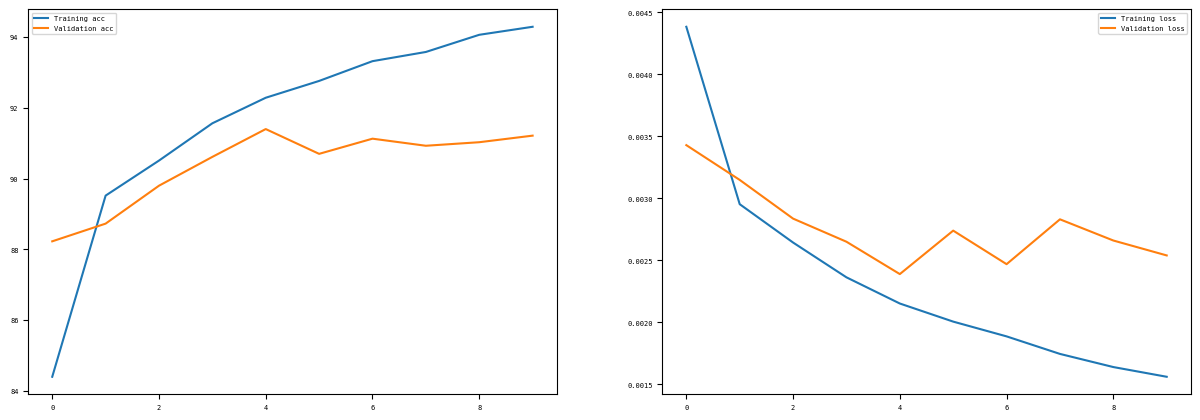

In [15]:
hist = train(net, train_loader, valid_loader, epochs=10) #조건 2-III 훈련 데이터를 사용하여 모델을 훈련시키고, 훈련 과정에서의 손실과 정확도를 모니터링합니다.

if hist is None:
    # 만약 훈련이력이 반환되지 않았을 경우, 훈련이력이 반환되지 않았다는 메시지를 출력합니다.
    print("Training did not return any history.")
else:
    # 그렇지 않으면, 결과를 시각화하고 테스트 및 클래스별 정확도를 평가합니다.
    plot_results(hist)  # 결과를 시각화합니다.
    
    test(net, test_loader)  #조건 3-I 테스트 데이터셋을 사용하여 모델을 평가하고, 최종 정확도를 보고합니다.

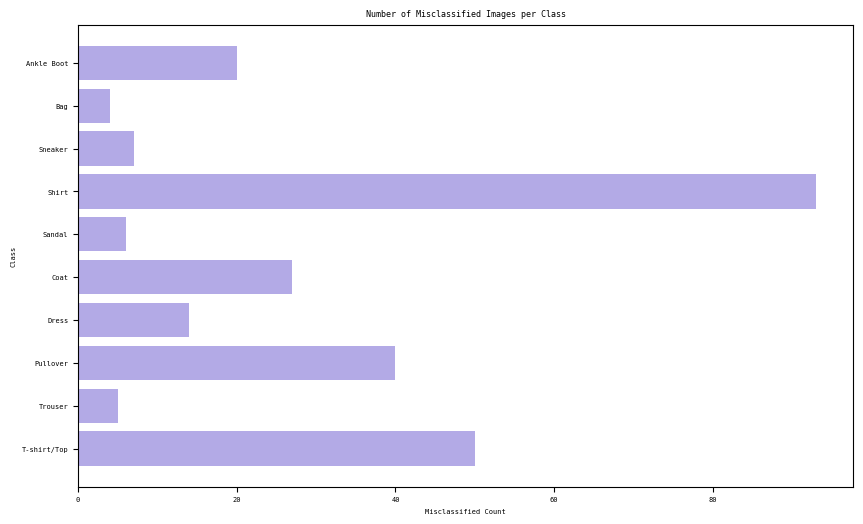

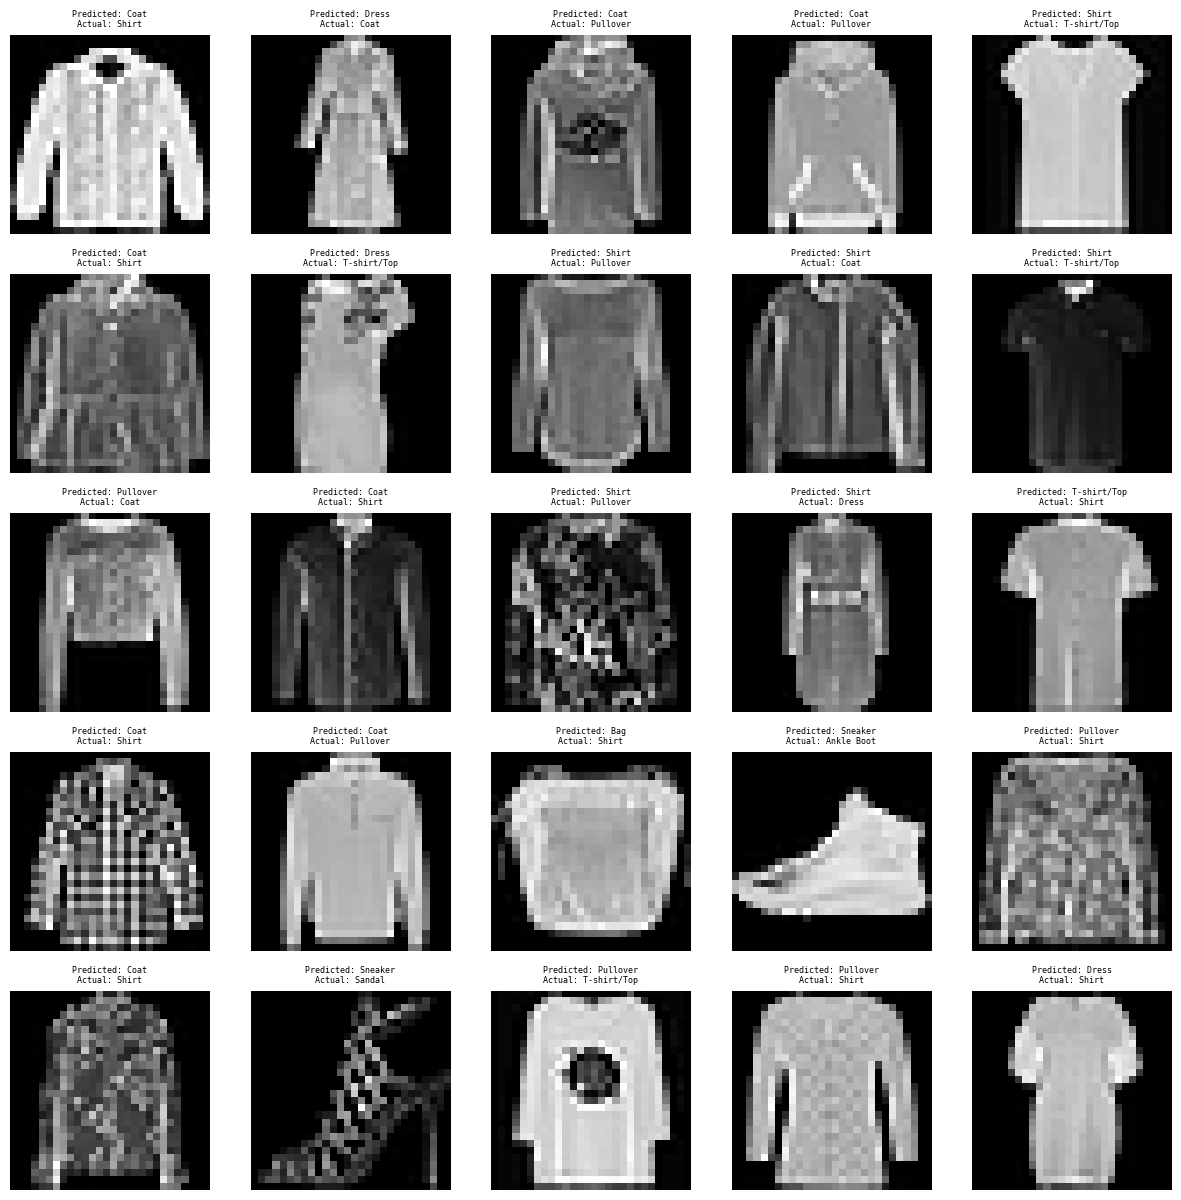

잘못 분류된 횟수:
T-shirt/Top: 50
Trouser: 5
Pullover: 40
Dress: 14
Coat: 27
Sandal: 6
Shirt: 93
Sneaker: 7
Bag: 4
Ankle Boot: 20
T-shirt/Top의 정확도: 82.94%
Trouser의 정확도: 98.33%
Pullover의 정확도: 86.93%
Dress의 정확도: 95.39%
Coat의 정확도: 91.43%
Sandal의 정확도: 97.76%
Shirt의 정확도: 70.19%
Sneaker의 정확도: 97.70%
Bag의 정확도: 98.62%
Ankle Boot의 정확도: 93.55%
Shirt의 정확도가 가장 낮습니다: 70.19%


In [16]:
#조건 3- II 잘못 분류된 이미지들을 분석하고, 어떤 클래스가 모델에 의해 가장 잘못 분류되었는지를 식별합니다.

def analyze_misclassified_images(model, test_loader, class_names):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # 사용 가능한 장치 설정
    model.eval()  # 모델을 평가 모드로 설정하여 그래디언트 계산 비활성화

    misclassified_images = []  # 잘못 분류된 이미지들을 저장할 리스트
    misclassified_count = {class_name: 0 for class_name in class_names}  # 각 클래스 별로 잘못 분류된 횟수를 저장할 딕셔너리

    with torch.no_grad():  # 그래디언트 계산 비활성화
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)  # 모델에 이미지 전달하여 예측 얻기
            _, predicted = torch.max(outputs.data, 1)  # 가장 높은 확률을 갖는 클래스 선택

            # 실제 레이블과 예측 레이블이 다른 경우를 찾음
            misclassified_indices = (predicted != labels).nonzero()[:, 0]
            for index in misclassified_indices:
                misclassified_images.append((images[index], predicted[index], labels[index]))
                misclassified_count[class_names[labels[index].item()]] += 1

    # 각 클래스 별로 잘못 분류된 횟수를 막대 그래프로 시각화
    visualize_misclassified_counts(misclassified_count)

    # 잘못 분류된 이미지들 출력
    plt.figure(figsize=(15, 15))
    for i, (image, predicted, label) in enumerate(misclassified_images[:25]):
        plt.subplot(5, 5, i + 1)
        plt.imshow(image.cpu().squeeze(), cmap='gray')
        plt.title(f'Predicted: {class_names[predicted.item()]}\nActual: {class_names[label.item()]}')
        plt.axis('off')
    plt.show()

    # 각 클래스 별로 잘못 분류된 횟수 출력
    print("잘못 분류된 횟수:")
    for class_name, count in misclassified_count.items():
        print(f"{class_name}: {count}")

def visualize_misclassified_counts(misclassified_count):
    class_names = list(misclassified_count.keys())
    misclassified_counts = list(misclassified_count.values())

    # 각 클래스 별로 잘못 분류된 횟수를 막대 그래프로 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(class_names, misclassified_counts, color='#B3AAE6')  # 수평 막대 그래프
    plt.xlabel('Misclassified Count')
    plt.ylabel('Class')
    plt.title('Number of Misclassified Images per Class')
    plt.show()

# 잘못 분류된 이미지들을 분석하여 잘못 분류된 횟수를 시각화하고, 잘못 분류된 이미지들을 출력
analyze_misclassified_images(net, test_loader, class_names) 
class_accuracy(net, test_loader)  # 클래스별 정확도를 계산합니다.
